In [2]:
import sys
print(sys.version)
import numpy
print(numpy.__version__)
import matplotlib
print(matplotlib.__version__)

3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
1.13.3
2.1.0


See help here:
http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

In [1]:
%matplotlib inline
from IPython.display import HTML as ipy_html
# ipy_html(anim.to_html5_video())
rc('animation', html='html5')    # equivalent to rcParams['animation.html'] = 'html5'

NameError: name 'rc' is not defined

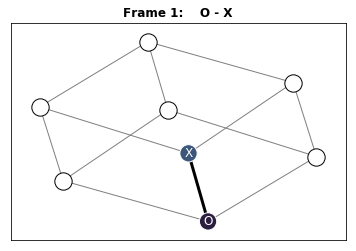

In [26]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import matplotlib.animation as animation

# Create Graph
np.random.seed(2)
G = nx.cubical_graph()
G = nx.relabel_nodes(G, {0:"O", 1:"X", 2:"XZ", 3:"Z", 4:"Y", 5:"YZ", 6: "XYZ", 7:"XY"})
pos = nx.spring_layout(G)

# Sequence of letters
sequence_of_letters = "".join(['X', 'Y', 'Z', 'Y', 'Y', 'Z'])
idx_colors = sns.cubehelix_palette(5, start=.5, rot=-.75)[::-1]
idx_weights = [3,2,1]

# Build plot
fig, ax = plt.subplots(figsize=(6,4))

def update(num):
    ax.clear()
    i = num // 3
    j = num % 3 + 1
    triad = sequence_of_letters[i:i+3]
    path = ["O"] + ["".join(sorted(set(triad[:k + 1]))) for k in range(j)]

    # Background nodes
    nx.draw_networkx_edges(G, pos=pos, ax=ax, edge_color="gray")
    null_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=set(G.nodes()) - set(path), node_color="white",  ax=ax)
    null_nodes.set_edgecolor("black")

    # Query nodes
    query_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=path, node_color=idx_colors[:len(path)], ax=ax)
    query_nodes.set_edgecolor("white")
    nx.draw_networkx_labels(G, pos=pos, labels=dict(zip(path,path)),  font_color="white", ax=ax)
    edgelist = [path[k:k+2] for k in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos=pos, edgelist=edgelist, width=idx_weights[:len(path)], ax=ax)

    # Scale plot ax
    ax.set_title("Frame %d:    "%(num+1) +  " - ".join(path), fontweight="bold")
    ax.set_xticks([])
    ax.set_yticks([])


anim = animation.FuncAnimation(fig, update, frames=6, interval=1000, repeat=True)
#ipy_html(anim.to_html5_video())
anim

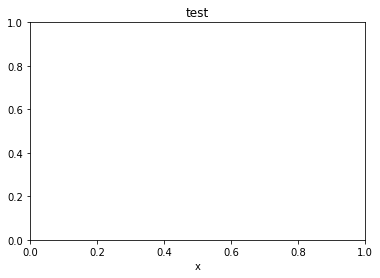

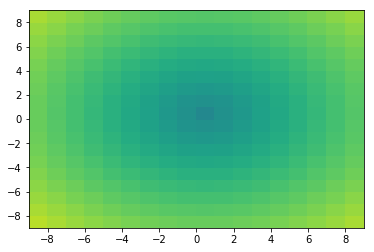

In [27]:
"""
=========================
Simple animation examples
=========================

This example contains two animations. The first is a random walk plot. The
second is an image animation.
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)

# To save the animation, use the command: line_ani.save('lines.mp4')

fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000, blit=True)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})

#plt.show()

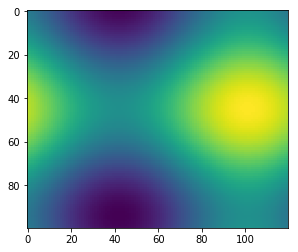

In [18]:
"""
=================
An animated image
=================

This example demonstrates how to animate an image.
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#from JSAnimation import IPython_display

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), animated=True)


def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
#plt.show()
ani

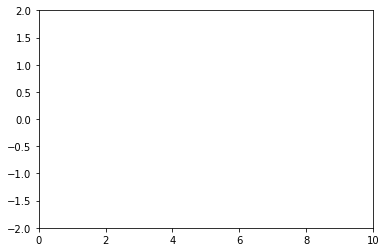

In [6]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

x = np.linspace(0, 10, 1000)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(x, np.cos(i * 0.02 * np.pi) * np.sin(x - i * 0.02 * np.pi))
    return line,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=100, interval=20, blit=True)

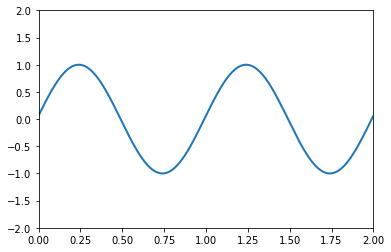

In [16]:
%matplotlib inline
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# call our new function to display the animation
anim

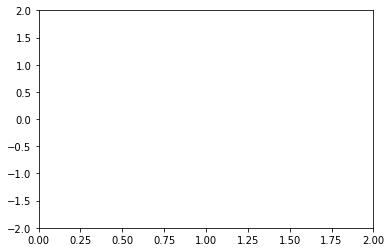

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

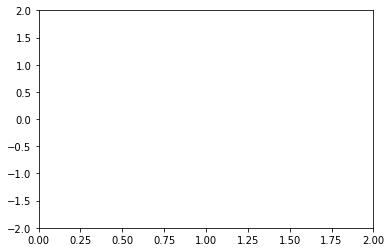

In [8]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [9]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [10]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [11]:
HTML(anim.to_html5_video())

In [12]:
anim._repr_html_() is None

True

In [13]:
anim

In [14]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [15]:
anim